## Imports

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

## Load Data

In [2]:
iris = load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
iris_data = iris['data']
iris_target = iris['target']

In [4]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [5]:
iris_df['target'] = iris_target

In [6]:
iris_df['target_name'] = iris_df['target'].map(dict(enumerate(iris['target_names'])))

### Plot

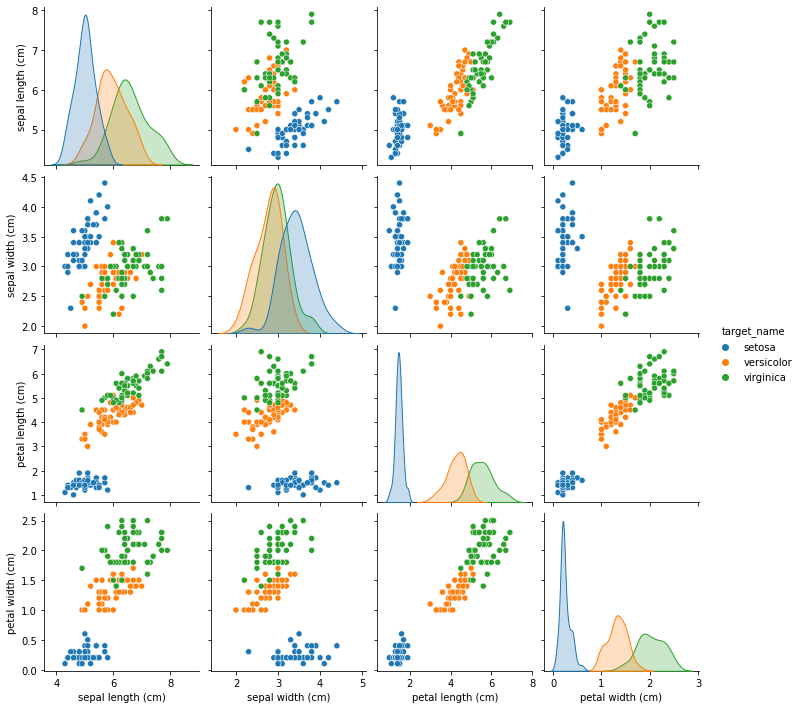

In [7]:
sns.pairplot(iris_df, vars=iris['feature_names'], hue='target_name')
plt.show()

## Model

In [8]:
bin_iris_df = iris_df[iris_df['target_name'] != 'setosa']

In [9]:
response = 'target'
predictors = ['sepal length (cm)', 'sepal width (cm)']

X = bin_iris_df[predictors].values
y = (bin_iris_df[response] == 2).astype(np.int32)

In [10]:
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(n_estimators=50, random_state=42)
clf3 = GaussianNB()
clf4 = SVC(probability=True)


In [11]:

eclf1 = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('svm', clf4)],
    voting='hard'
)

eclf1 = eclf1.fit(X, y)

y_pred_hard = eclf1.predict(X)

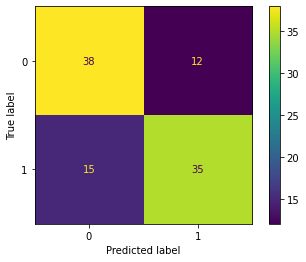

In [12]:
cm = confusion_matrix(y, y_pred_hard, labels=eclf1.classes_)
# cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=eclf1.classes_)
disp.plot()
plt.show()

In [13]:

eclf2 = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('svm', clf4)],
    voting='soft'
)

eclf2 = eclf2.fit(X, y)

y_pred_soft = eclf2.predict(X)

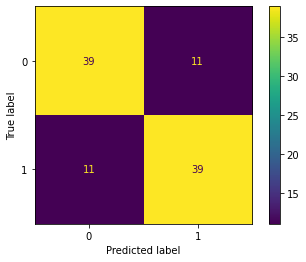

In [14]:
cm = confusion_matrix(y, y_pred_soft, labels=eclf2.classes_)
# cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=eclf2.classes_)
disp.plot()
plt.show()